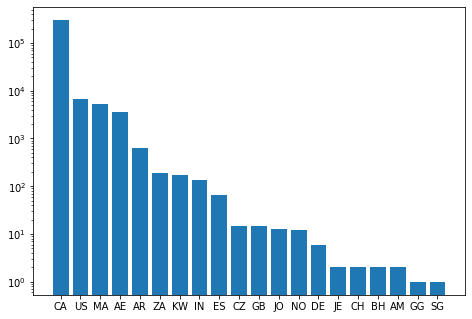

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

wildlife = pd.read_csv("../Data/CITES_wildlife_trade_database.csv")
wildlife.head()

reintroduction = wildlife[wildlife['Purpose'].isin(['N'])]

exporterdict = {}
for index, row in reintroduction.iterrows():
    exporter = row['Exporter']
    imprq = row['Importer reported quantity']
    emprq = row['Exporter reported quantity']
    
    
    if emprq > 0:
        quantity = emprq
    elif imprq > 0:
        quantity = imprq
    else:
        quantity = 0
    
    if exporter in exporterdict:
        exporterdict[exporter] += quantity 
    else:
        
        exporterdict[exporter]  = quantity

sortedexportdict = sorted(exporterdict.items(),key = lambda x: x[1],reverse=True)
#print(sortedexportdict)

list1, list2 = zip(*sortedexportdict)
#print(list2)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = list1
students = list2
ax.bar(langs,students)
plt.yscale("log")
plt.show()

<Figure size 432x288 with 0 Axes>

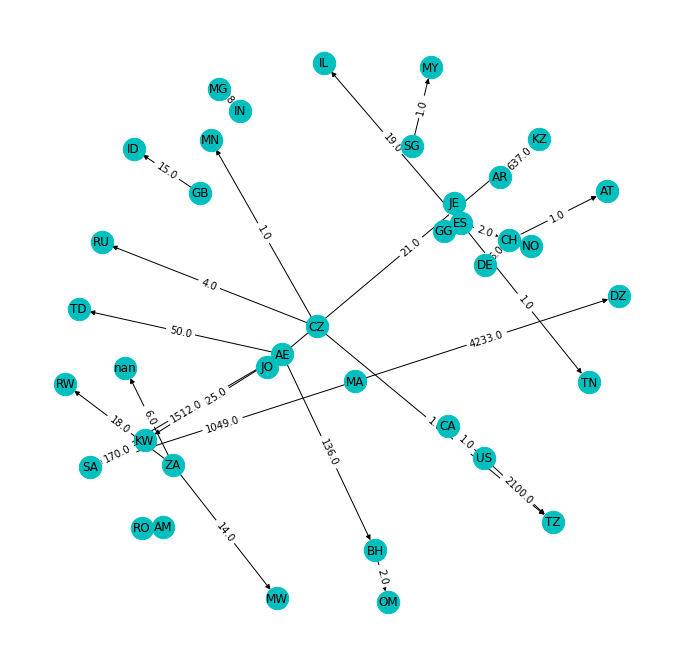

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

wildlife = pd.read_csv("../Data/CITES_wildlife_trade_database.csv")
wildlife.head()

reintroduction = wildlife[wildlife['Purpose'].isin(['N'])]

nodes = []
edges = []
edgevalues = {}
for index, row in reintroduction.iterrows():
    exporter = row['Exporter']
    importer = row['Importer']
    imprq = row['Importer reported quantity']
    emprq = row['Exporter reported quantity']
    
    if emprq > 0:
        quantity = emprq
    elif imprq > 0:
        quantity = imprq
    else:
        quantity = 0
    
    edge = (exporter,importer)
    if edge in edges:
        pass
    else:
        edges.append(edge)
        
        if edge in edgevalues.keys():
            edgevalues[edge] += quantity
        else:
            edgevalues[edge] = quantity
        
    if exporter in nodes:
        pass
    else:
        nodes.append(exporter)
    if importer in nodes:
        pass
    else:
        nodes.append(importer)
        


G=nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)


plt.figure()
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)
nx.draw_networkx_labels(G,pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edgevalues)
nx.draw(G,pos,node_size=500,node_color="c")

plt.savefig("../Figures/export_network.png")
plt.show()